<a href="https://colab.research.google.com/github/Monika1kaphle/AI-coursework/blob/main/2408878_MonikaKaphle_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assesment
!ls causes-of-death-in-children-under-5.csv

Mounted at /content/drive
/content/drive/MyDrive/Assesment
causes-of-death-in-children-under-5.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("causes-of-death-in-children-under-5.csv")

In [ ]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                 Entity Code  Year  \
0           Afghanistan  AFG  1990   
1  African Region (WHO)    0  1990   
2               Albania  ALB  1990   
3               Algeria  DZA  1990   
4        American Samoa  ASM  1990   

   Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)  \
0                                                 48                                       
1                                              26869                                       
2                                                  0                                       
3                                                 16                                       
4                                                  0                                       

   Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)  \
0                                                105                     
1                                               4381 

In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 32 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   Entity                                                                                                 6840 non-null   object
 1   Code                                                                                                   6840 non-null   object
 2   Year                                                                                                   6840 non-null   int64 
 3   Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)                  6840 non-null   int64 
 4   Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)                    

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Entity                                                                                                   0
Code                                                                                                     0
Year                                                                                                     0
Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)                    0
Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)                                      0
Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)                                    0
Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)                                             0
Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)                                                   0
Deaths - Measles - Sex: Both - Age: Under 5 (Number)                                                     0
Deaths - Digestive d

In [ ]:
# Convert date columns (if present) to datetime and then to timestamp (numeric)
if 'df' in df.columns:  # Replace 'date' with the actual column name if it's different
    df['df'] = pd.to_datetime(df['df'])
    df['df'] = df['df'].astype(int) / 10**9  # Convert to timestamp in seconds

df = df.drop(columns=["Year"])
df.head()

,Entity,Code,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number),...,Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number),Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
0,Afghanistan,AFG,48,105,1779,718,431,8649,477,182,...,7112,2455,3968,131,802,808,10,776,21,123
1,African Region (WHO),0,26869,4381,170136,3388,17987,311413,17025,3345,...,100379,71931,686390,9165,28173,78180,67976,16651,447410,54547
2,Albania,ALB,0,5,33,3,44,176,136,10,...,310,25,68,11,27,4,0,34,0,10
3,Algeria,DZA,16,17,316,92,182,2599,239,77,...,3326,628,2666,217,1446,94,15,310,0,163
4,American Samoa,ASM,0,0,1,0,0,2,0,0,...,2,1,1,0,0,0,0,0,0,3


In [ ]:
print(df.columns)


Index(['Code',
       'Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Measles - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Chronic kidney disease - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cardiovascular diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neonatal preterm birth

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Check if 'Entity_Code' exists before applying encoding
if 'Entity_Code' in df.columns and 'Code' in df.columns:
    label_encoder = LabelEncoder()
    df['Entity_Numeric'] = label_encoder.fit_transform(df['Entity_Code'])
    df['Code_Numeric'] = label_encoder.fit_transform(df['Code'])
    print(df[['Entity_Code', 'Entity_Numeric', 'Code', 'Code_Numeric']].head())
else:
    print("Error: 'Entity_Code' or 'Code' column not found in the dataset.")


   Entity_Code  Entity_Numeric Code  Code_Numeric
0            0               0  AFG             1
1            1               1    0             0
2            2               2  ALB             3
3            3               3  DZA            53
4            4               4  ASM             8


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data (Replace with your actual DataFrame)
df = pd.DataFrame(df)  # This line is unnecessary, remove it if df is already a DataFrame

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Ensure correct column names
if 'Entity_Code' in df.columns and 'Code' in df.columns:
    df['Entity_Numeric'] = label_encoder.fit_transform(df['Entity_Code'])
    df['Code_Numeric'] = label_encoder.fit_transform(df['Code'])
    print(df[['Entity_Code', 'Entity_Numeric', 'Code', 'Code_Numeric']].head())
else:
    print("Error: 'Entity_Code' or 'Code' column not found in the dataset.")


   Entity_Code  Entity_Numeric Code  Code_Numeric
0            0               0  AFG             1
1            1               1    0             0
2            2               2  ALB             3
3            3               3  DZA            53
4            4               4  ASM             8


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Ensure correct column names exist
if 'Entity_Code' in df.columns and 'Code' in df.columns:
    df['Entity_Code'] = label_encoder.fit_transform(df['Entity_Code'])  # Convert to numeric
    df['Code'] = label_encoder.fit_transform(df['Code'])  # Convert to numeric
    print(df.head())  # Display the updated DataFrame
else:
    print("Error: 'Entity_Code' or 'Code' column not found in the dataset.")

   Code  \
0     1   
1     0   
2     3   
3    53   
4     8   

   Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)  \
0                                                 48                                       
1                                              26869                                       
2                                                  0                                       
3                                                 16                                       
4                                                  0                                       

   Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)  \
0                                                105                     
1                                               4381                     
2                                                  5                     
3                                                 17                     
4         

In [ ]:
df.fillna(df.median(), inplace=True)
print("Missing values filled using median!")
df.head()

Missing values filled using median!


,Code,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number),Deaths - Chronic kidney disease - Sex: Both - Age: Under 5 (Number),...,"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number),Entity_Code,Entity_Numeric,Code_Numeric
0,1,48,105,1779,718,431,8649,477,182,211,...,131,802,808,10,776,21,123,0,0,1
1,0,26869,4381,170136,3388,17987,311413,17025,3345,4690,...,9165,28173,78180,67976,16651,447410,54547,1,1,0
2,3,0,5,33,3,44,176,136,10,10,...,11,27,4,0,34,0,10,2,2,3
3,53,16,17,316,92,182,2599,239,77,138,...,217,1446,94,15,310,0,163,3,3,53
4,8,0,0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,3,4,4,8


In [ ]:
print(df.isnull().sum())

Code                                                                                                     0
Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)                    0
Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)                                      0
Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)                                    0
Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)                                             0
Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)                                                   0
Deaths - Measles - Sex: Both - Age: Under 5 (Number)                                                     0
Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number)                                          0
Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number)                  0
Deaths - Chronic kidney disease - Sex

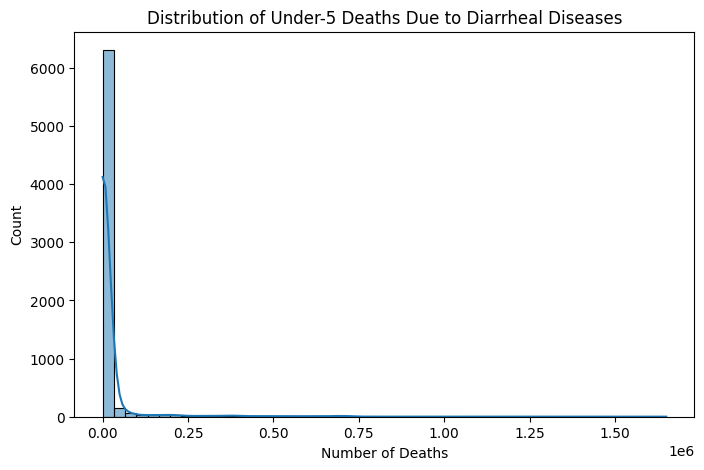

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)"], bins=50, kde=True)
plt.title("Distribution of Under-5 Deaths Due to Diarrheal Diseases")
plt.xlabel("Number of Deaths")
plt.show()

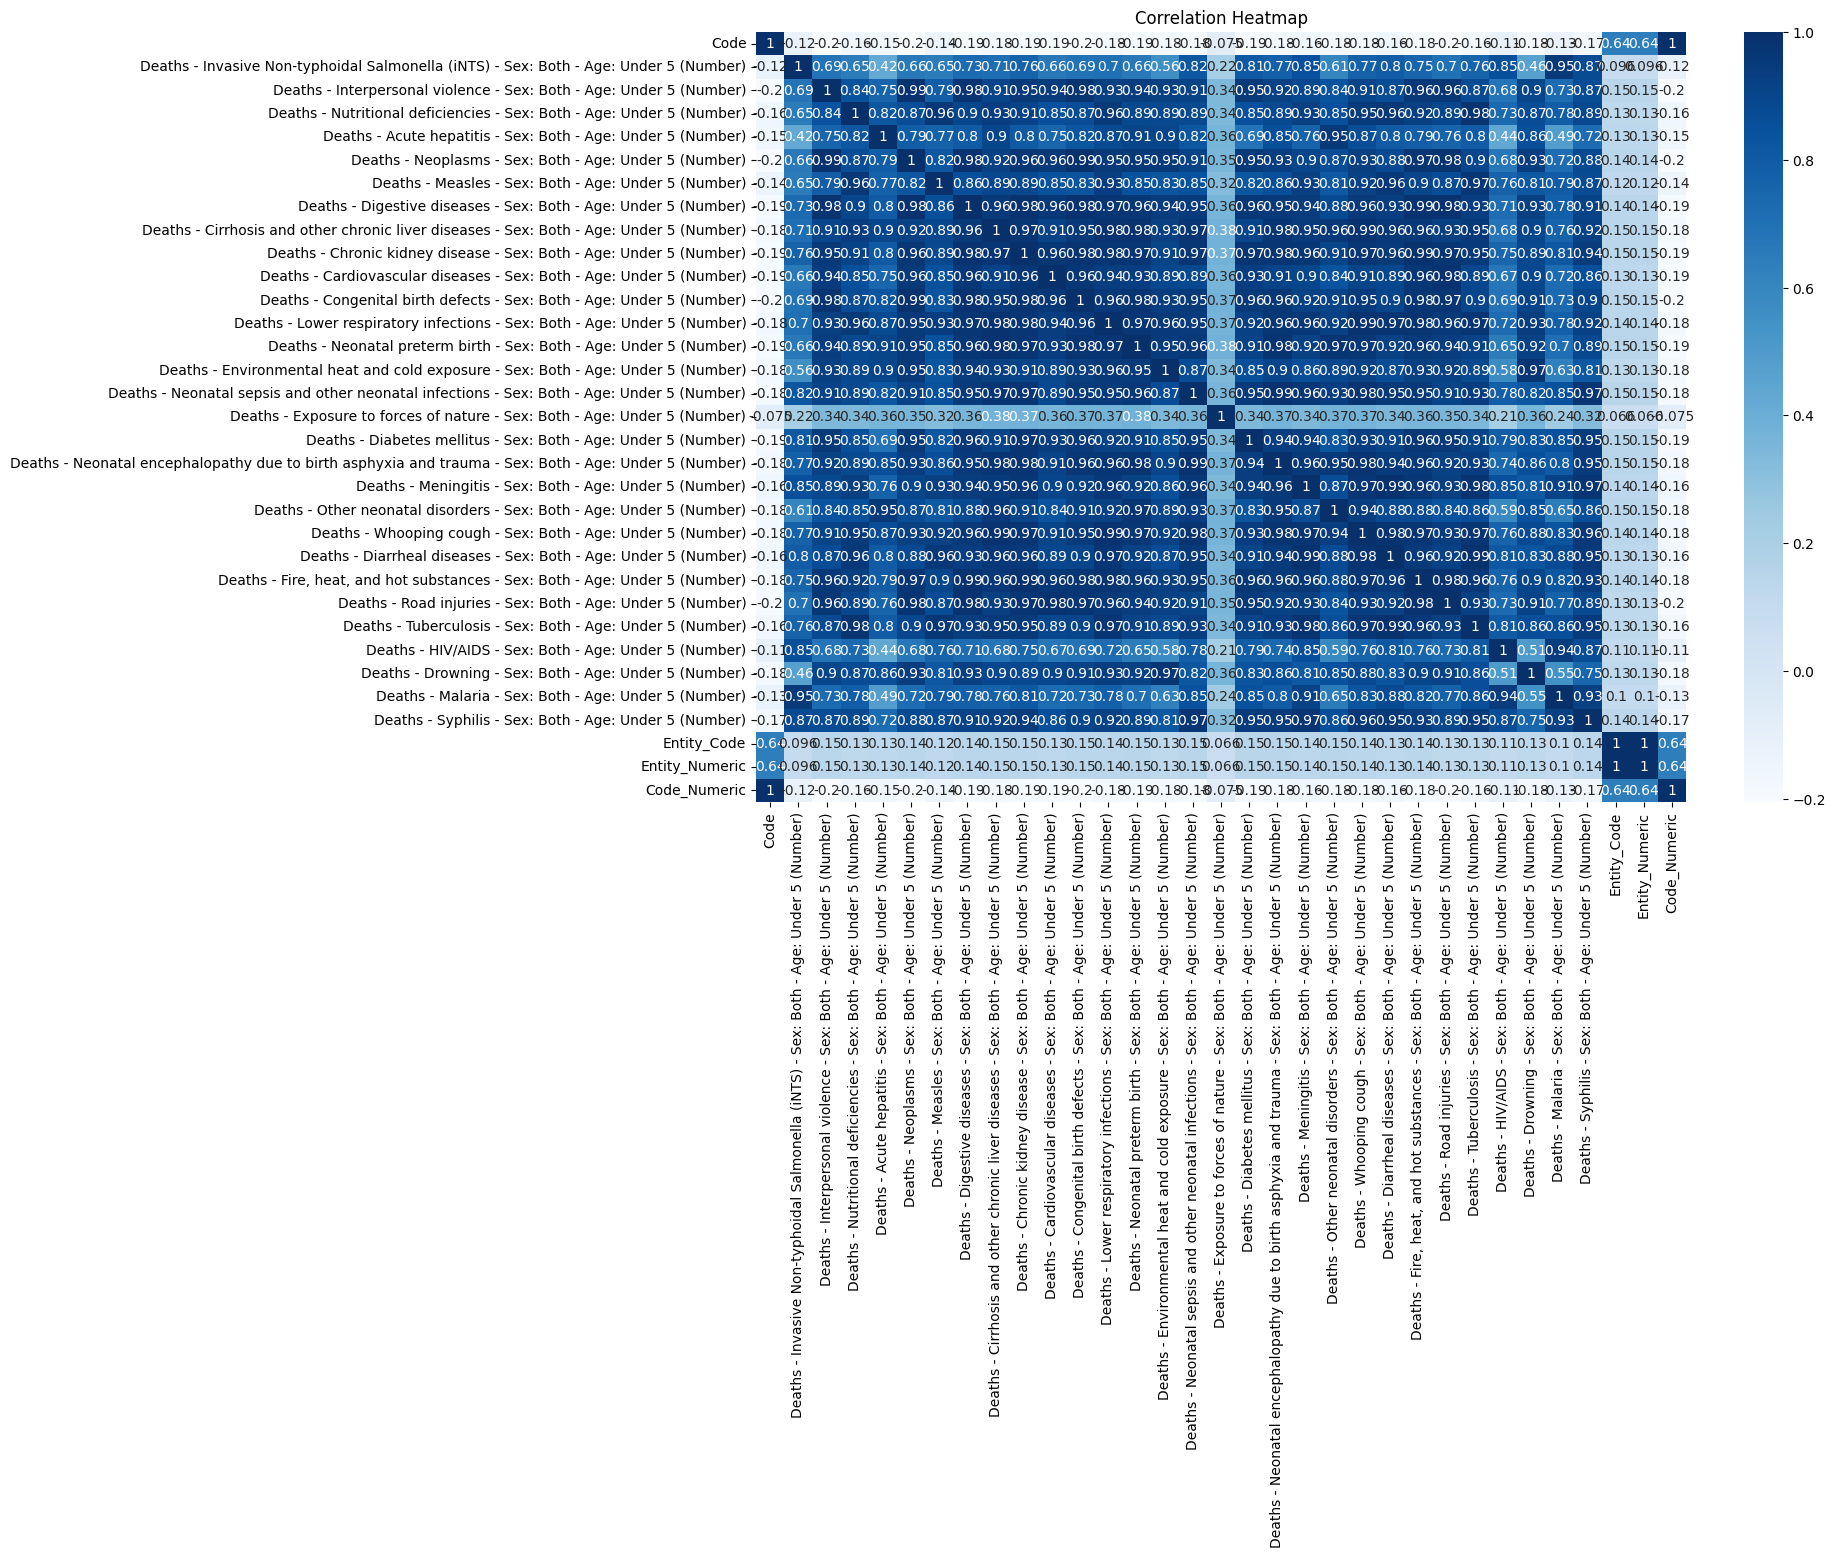

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

#1.2.2 Build a Model from Scratch

In [ ]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)"])  # Drop target column
y = df["Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)"]  # Set target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.005, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            error = y_predicted - y

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
model = LinearRegressionScratch(learning_rate=0.002, epochs=10000)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance: MSE = {mse:.4f}, R² = {r2:.4f}")

Model Performance: MSE = 29422734.0816, R² = 0.9976


###1.2.3 Build a Primary Model

In [ ]:
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train, y_train)

y_pred_sklearn = sklearn_lr.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Scikit-Learn Linear Regression - MSE: {mse_sklearn:.4f}, R²: {r2_sklearn:.4f}")

Scikit-Learn Linear Regression - MSE: 20138698.6411, R²: 0.9983


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared Score: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")

Random Forest Performance:
Mean Squared Error: 10855173.2444
R-squared Score: 0.9991
Mean Absolute Error: 779.9396


#1.2.4 Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
print("Best Ridge Regression Hyperparameters:", ridge_grid.best_params_)

y_pred_ridge = best_ridge.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression Performance: R² = {ridge_r2:.4f}, MSE = {ridge_mse:.4f}")

Best Ridge Regression Hyperparameters: {'alpha': 0.01}
Ridge Regression Performance: R² = 0.9983, MSE = 20133973.6115


#Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                               param_distributions=rf_params,
                               n_iter=5,
                               cv=3, scoring="r2",
                               n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("Best Random Forest Hyperparameters:", rf_search.best_params_)

y_pred_rf = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Performance: R² = {rf_r2:.4f}, MSE = {rf_mse:.4f}")

Best Random Forest Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Random Forest Performance: R² = 0.9991, MSE = 11274773.0824


###1.2.5  Feature Selection


In [ ]:
sfm_rf = SelectFromModel(rf, threshold="median")
sfm_rf.fit(X_train, y_train)

selected_features_rf = sfm_rf.get_support()
selected_columns_rf = X.columns[selected_features_rf]

print("Selected features using Random Forest:")
print(selected_columns_rf)

Selected features using Random Forest:
Index(['Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Measles - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cardiovascular diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Environmental heat and cold exposure - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Diabetes mellitus - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Meningitis - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)',
       'Deaths

In [ ]:
from sklearn.linear_model import Lasso

sfm_lasso = SelectFromModel(Lasso(alpha=0.01), threshold="median")

sfm_lasso.fit(X_train, y_train)

selected_features_lasso = sfm_lasso.get_support()
selected_columns_lasso = X.columns[selected_features_lasso]

print("Selected Features using Lasso Regression:")
print(selected_columns_lasso)


Selected Features using Lasso Regression:
Index(['Code',
       'Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Measles - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Environmental heat and cold exposure - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Diabetes mellitus - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Tuberculosis - Sex: 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.917e+10, tolerance: 7.133e+09
  model = cd_fast.enet_coordinate_descent(


#1.2.6 Final Model

In [ ]:
X_train_rf_selected = sfm_rf.transform(X_train)
X_test_rf_selected = sfm_rf.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_selected, y_train)

y_pred_rf = rf_model.predict(X_test_rf_selected)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"RandomForest-Selected Features Performance: R² = {rf_r2:.4f}, MSE = {rf_mse:.4f}")

RandomForest-Selected Features Performance: R² = 0.9992, MSE = 10138830.0209


In [ ]:
X_train_lasso_selected = sfm_lasso.transform(X_train)
X_test_lasso_selected = sfm_lasso.transform(X_test)

rf_model_lasso = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lasso.fit(X_train_lasso_selected, y_train)

y_pred_lasso = rf_model_lasso.predict(X_test_lasso_selected)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso-Selected Features Performance: R² = {lasso_r2:.4f}, MSE = {lasso_mse:.4f}")

Lasso-Selected Features Performance: R² = 0.9988, MSE = 14264108.5048
